# TM10007 Assignment
Made by: Sifra Kuiper, Imme Spiekerman, Florien Algera and Nico Frijns

**Explanation of what this code will achieve**

This part of the code will connect this document to the github-location where the data is stored.

In [1]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/NFAFrijns/TM10007_G1_lipo.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 6

## Pre-processing

**Explanation of what is happening**

In [2]:
## HET SPLITSEN VAN DATA IN TRAINING EN DATA GROEP

## PRE-PROCESSING FUNCTIE VAN NICO
## PRE-PROCCESSING FUNCTIE TOEGEPAST OP DE TRAINING DATA

## Choosing the right classifier

**Explanation of what is happening**


In [3]:
import pandas as pd
from worclipo.load_data import load_data
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

#Inladen data
feature_data = load_data()
X_train = feature_data.iloc[:, 2:]
y_train = feature_data['label']

#Feature selection
numb_components = 70     # number of components
x_scaled = StandardScaler().fit_transform(X_train) #DATA SCALING: voor nu even heel simple scaling, wachten op wat Nico doet voor echte voorbewerking
pca = PCA(n_components=numb_components) # Reduce from 4 to 3 features with PCA
pca_features = pca.fit_transform(x_scaled) # Fit and transform data
print('Original shape: ', x_scaled.shape) # Remake X_train with less components

# 80% explained variance
pca80 = PCA(n_components=0.80)
X_train_PCA80 = pca80.fit_transform(x_scaled)
print('PCA80 shape: ', X_train_PCA80.shape)

# 90% explained variance
pca90 = PCA(n_components=0.90)
X_train_PCA90 = pca90.fit_transform(x_scaled)
print('PCA90 shape: ', X_train_PCA90.shape)

# 95% explained variance
pca95 = PCA(n_components=0.95)
X_train_PCA95 = pca95.fit_transform(x_scaled)
print('PCA95 shape: ', X_train_PCA95.shape)

classifiers = [
    (svm.SVC(kernel='linear', C=1.0, random_state=42), "LinSVM"),
    (svm.SVC(kernel="rbf", gamma=0.7, C=1.0), "rbfSVM"),
    (svm.SVC(kernel="poly", degree=2, gamma="auto", C=1.0), "polySVM"),
    (HistGradientBoostingClassifier(max_iter=100), "GBDT"),
    (KNeighborsClassifier(n_neighbors=5), "KNN"),
    (ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0), "RF"),
    (BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5), "Bagging meta-estimator"),
    (LogisticRegression(random_state=1), "LR"),
    (GaussianNB(), "NB")
]

results = {}
for clf, label in classifiers:
    # Scores berekenen voor PCA80
    scores_PCA80 = cross_val_score(clf, X_train_PCA80, y_train, cv=5)
    mean_accuracy_PCA80 = scores_PCA80.mean()
    std_dev_PCA80 = scores_PCA80.std()

    # Scores berekenen voor PCA90
    scores_PCA90 = cross_val_score(clf, X_train_PCA90, y_train, cv=5)
    mean_accuracy_PCA90 = scores_PCA90.mean()
    std_dev_PCA90 = scores_PCA90.std()

    # Scores berekenen voor PCA95
    scores_PCA95 = cross_val_score(clf, X_train_PCA95, y_train, cv=5)
    mean_accuracy_PCA95 = scores_PCA95.mean()
    std_dev_PCA95 = scores_PCA95.std()

    # Opslaan van resultaten
    results[label + ' (PCA 80%)'] = (mean_accuracy_PCA80, std_dev_PCA80)
    results[label + ' (PCA 90%)'] = (mean_accuracy_PCA90, std_dev_PCA90)
    results[label + ' (PCA 95%)'] = (mean_accuracy_PCA95, std_dev_PCA95)


Original shape:  (115, 492)
PCA80 shape:  (115, 18)
PCA90 shape:  (115, 34)
PCA95 shape:  (115, 49)


**Visualization of the performance of the different classifiers**

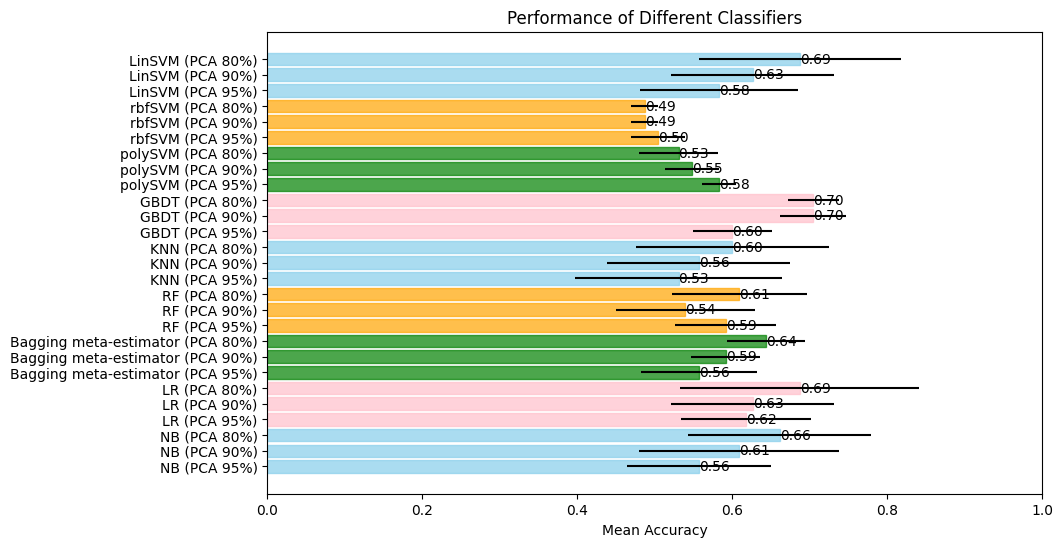

In [7]:
# Plot resultaten
labels = list(results.keys())
mean_accuracies = [result[0] for result in results.values()]
std_devs = [result[1] for result in results.values()]
colors = ['skyblue', 'skyblue', 'skyblue', 'orange', 'orange', 'orange', 'green', 'green', 'green', 'pink', 'pink', 'pink']

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, mean_accuracies, xerr=std_devs, edgecolor='black', alpha=0.7)

# Loop door elke balk en pas de kleur aan op basis van de index van de classifier in de lijst
for i, bar in enumerate(bars):
    bar.set_color(colors[i % len(colors)])  # Gebruik modulo om ervoor te zorgen dat kleuren worden hergebruikt indien nodig
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{mean_accuracies[i]:.2f}', va='center')

plt.xlabel('Mean Accuracy')
plt.title('Performance of Different Classifiers')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

## Optimalization of the GBDT classifier

**Explanation of code**

In [ ]:
##CODE

## Visualization of the performance of the trained classifier

In [ ]:
## CODE